
# <font style="color: #d60e8c; text-align:center;">Práctica 5: Redes neuronales convolucionales

- Autor 1: Fabio González Saavedra

# <font style="color: #d60e8c; text-align:center;">Introducción
<hr style="border: 0.5px solid #d60e8c;">

## Importamos las librerías

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import preprocessing
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [3]:
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import callbacks
from tensorflow.keras import utils 

In [4]:
SEED_VALUE = 0

# Fijamos al semilla para hacer determinista el entrenamiento.
np.random.seed(SEED_VALUE)
tf.random.set_seed(SEED_VALUE)
tf.keras.utils.set_random_seed(SEED_VALUE)

tf.config.experimental.enable_op_determinism()


## Cargamos los datos


In [5]:
from keras.datasets import mnist
# Cargar las imágenes
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [6]:
# Normalizar las imagenes de escala de grises 0–255 (entre 0 –1):
X_train = X_train / 255 
X_test = X_test / 255

# Codificar las etiquetas de clase en formato de vectores categoricos:
y_train_cat = utils.to_categorical (y_train) 
y_test_cat = utils.to_categorical (y_test)

In [6]:
_, n_rows, n_cols = X_train.shape
channels = 1

n_rows, n_cols, channels

(28, 28, 1)

## Exploramos los datos

Número de clases :  10
Clases :  [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'Clase : 7')

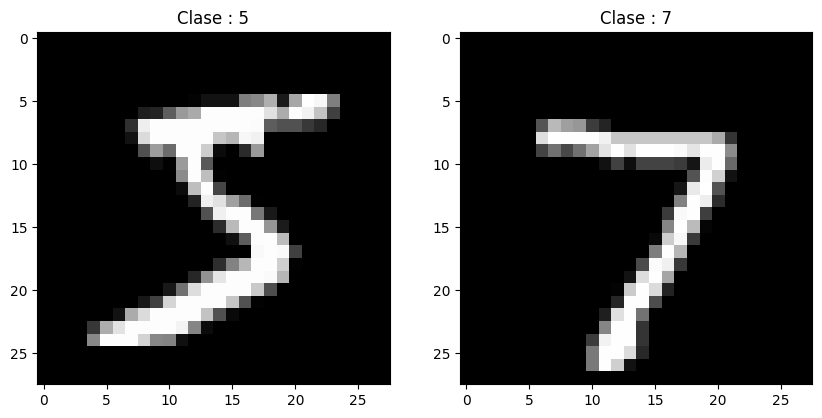

In [7]:
# Número de clases
classes = np.unique(y_train)
num_classes = y_train_cat[0].shape[0]

print('Número de clases : ', num_classes)
print('Clases : ', classes)

plt.figure(figsize=[10,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(X_train[0,:,:], cmap="gray")
plt.title(f"Clase : {y_train[0]}")

# Display the first image in testing data
plt.subplot(122)
plt.imshow(X_test[0,:,:], cmap="gray")
plt.title(f"Clase : {y_test[0]}")

In [8]:
print(f"Muestras entrenamiento: {X_train.shape[0]}")
print(f"Muestras test: {X_test.shape[0]}")
print(f"Total muestras: {X_train.shape[0] + X_test.shape[0]}")

Muestras entrenamiento: 60000
Muestras test: 10000
Total muestras: 70000


# <font style="color: #d60e8c;">Creamos el modelo
<hr style="border: 0.5px solid #d60e8c;">

Para implementar la CNN, añadiremos capas Convolucionales seguidas de capas de Max Pooling. Usaremos también Dropout para evitar el sobreentrenamniento. Finalmente, añadiremos un capa completamente conectada (Dense).


Información adicional sobre CNN:
- https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53


In [9]:
  model = keras.Sequential()

  model.add(layers.Conv2D(32, (3, 3), input_shape=(n_rows, n_cols, channels), activation="relu")) 
  model.add(layers.Conv2D(32, (3, 3),  activation="relu")) 
  model.add(layers.MaxPooling2D(pool_size=(2, 2))) 
  model.add(layers.Dropout(0.2))

  model.add(layers.Conv2D(64, (3, 3), activation="relu")) 
  model.add(layers.Conv2D(64, (3, 3), activation="relu")) 
  model.add(layers.MaxPooling2D(pool_size=(2, 2))) 
  model.add(layers.Dropout(0.2))

  model.add(layers.Flatten ())
  model.add(layers.Dense(64, activation="relu")) 
  model.add(layers.Dropout(0.2))
  # Capa de salida:
  model.add(layers.Dense(num_classes, activation="softmax"))
 
  model.compile(loss="categorical_crossentropy",optimizer="adam", metrics=['accuracy'])
  model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 64)          36928     
                                                        

In [10]:
max_epochs = 100
n_iter_no_change = 3

earlystop_callback = callbacks.EarlyStopping(monitor='val_loss', verbose = 1, restore_best_weights = True, patience=n_iter_no_change)

fit_history = model.fit(X_train , y_train_cat, 
    validation_data=(X_test , y_test_cat), 
    epochs=max_epochs, 
    batch_size=6000, 
    verbose=1,
    callbacks = [earlystop_callback])

Epoch 1/100
10/10 [==============================] - 15s 334ms/step - loss: 2.0307 - accuracy: 0.3095 - val_loss: 1.1668 - val_accuracy: 0.7047
Epoch 2/100
10/10 [==============================] - 3s 269ms/step - loss: 1.0044 - accuracy: 0.6635 - val_loss: 0.4323 - val_accuracy: 0.8787
Epoch 3/100
10/10 [==============================] - 3s 268ms/step - loss: 0.5025 - accuracy: 0.8413 - val_loss: 0.2404 - val_accuracy: 0.9300
Epoch 4/100
10/10 [==============================] - 3s 274ms/step - loss: 0.3055 - accuracy: 0.9066 - val_loss: 0.1523 - val_accuracy: 0.9527
Epoch 5/100
10/10 [==============================] - 3s 278ms/step - loss: 0.2098 - accuracy: 0.9363 - val_loss: 0.1109 - val_accuracy: 0.9655
Epoch 6/100
10/10 [==============================] - 3s 271ms/step - loss: 0.1646 - accuracy: 0.9505 - val_loss: 0.0840 - val_accuracy: 0.9743
Epoch 7/100
10/10 [==============================] - 3s 271ms/step - loss: 0.1365 - accuracy: 0.9595 - val_loss: 0.0707 - val_accuracy: 0.977

In [11]:
# Evaluacion del modelo utilizando los datos de test: 
scores = model.evaluate(X_test , y_test_cat , verbose=0)
print (f"Exactitud del modelo: {scores[1]}")

Exactitud del modelo: 0.9927999973297119


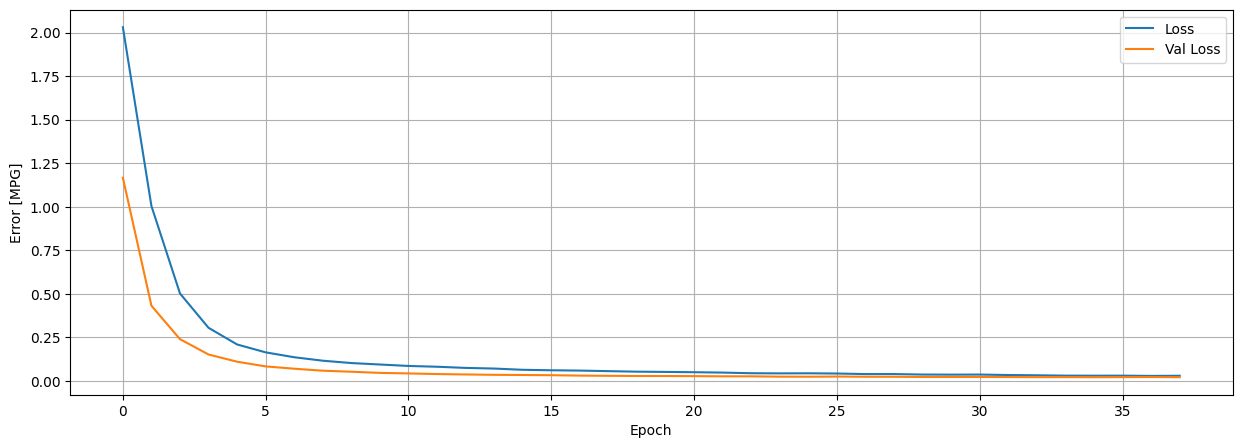

In [12]:
  plt.figure(figsize=(15,5))
  plt.plot(fit_history.history['loss'], label='Loss')
  plt.plot(fit_history.history['val_loss'], label='Val Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

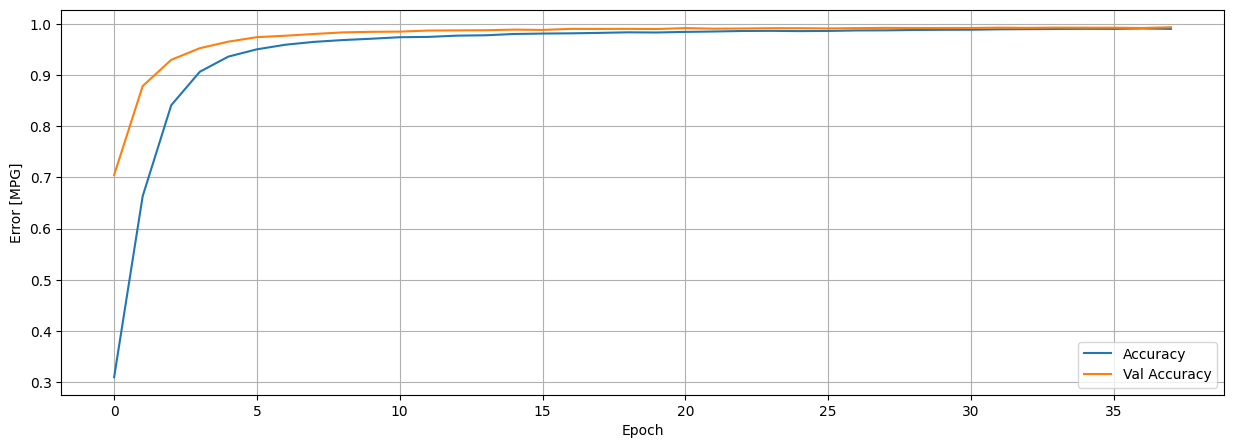

In [13]:
plt.figure(figsize=(15,5))
plt.plot(fit_history.history['accuracy'], label='Accuracy')
plt.plot(fit_history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.legend()
plt.grid(True)

<div class="alert alert-block alert-info" 
     style="border: 0px solid #d60e8c; border-radius: 10px; background:#d60e8c; color: white;">
   <h2>EJERCICIO</h2>
    <hr style="border: 0.5px solid #ffffff;">
    <ul style="margin-bottom: 20px;">
        <li>Aplica la red anterior al conjunto de datos <b>fashion_mnist</b>.</li>
        <li>Realiza cambios en las capas convolucionales (añadiendo capas y/o modificando los parámetros)</li>
        <li>Reponde las siguientes preguntas: 
           <ul>
              <li>¿Qué ocurre con el tamaño de la imagen tras pasar por las capas convolucionales?</li>
              <li>Mira la documentación de las capa <a href="https://keras.io/api/layers/convolution_layers/convolution2d/">Conv2D</a>: ¿qué parametro o parámetros afectan al tamaño de la salida de la capa convolucional? Escribe el nombre y el efecto que produce.</li>
              <li>¿Para qué crees que sirve el número de filtros de las capas convolucionales?</li>              
           </ul>
        </li>        
    </ul>
</div>

Priemro se prueba el modelo empleado antes

4422102/4422102 [==============================] - 1s 0us/step
28 28 1
Número de clases :  10
Clases :  [0 1 2 3 4 5 6 7 8 9]
Muestras entrenamiento: 60000
Muestras test: 10000
Total muestras: 70000
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 64)        

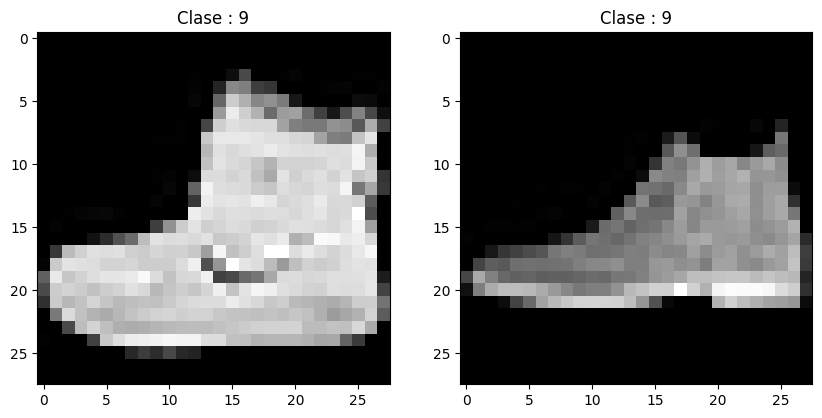

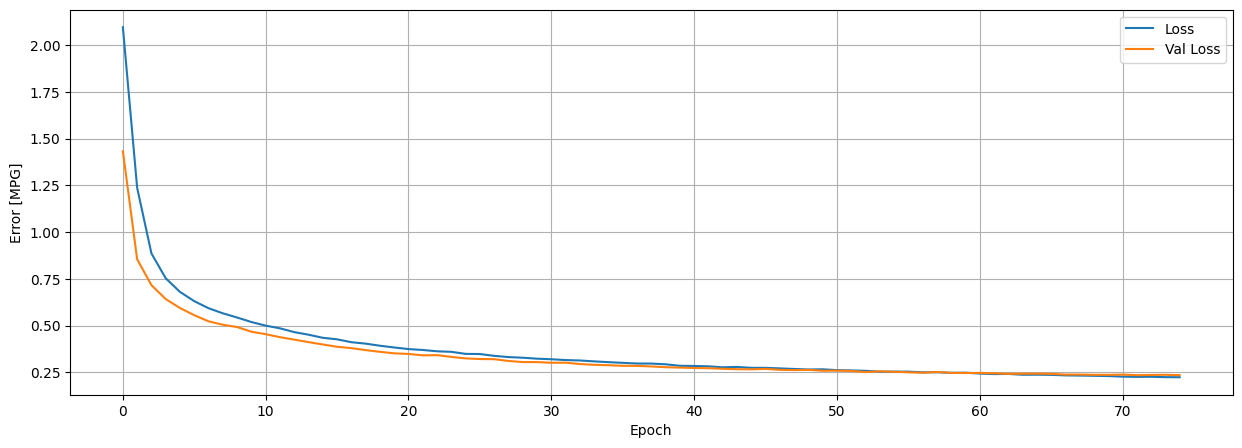

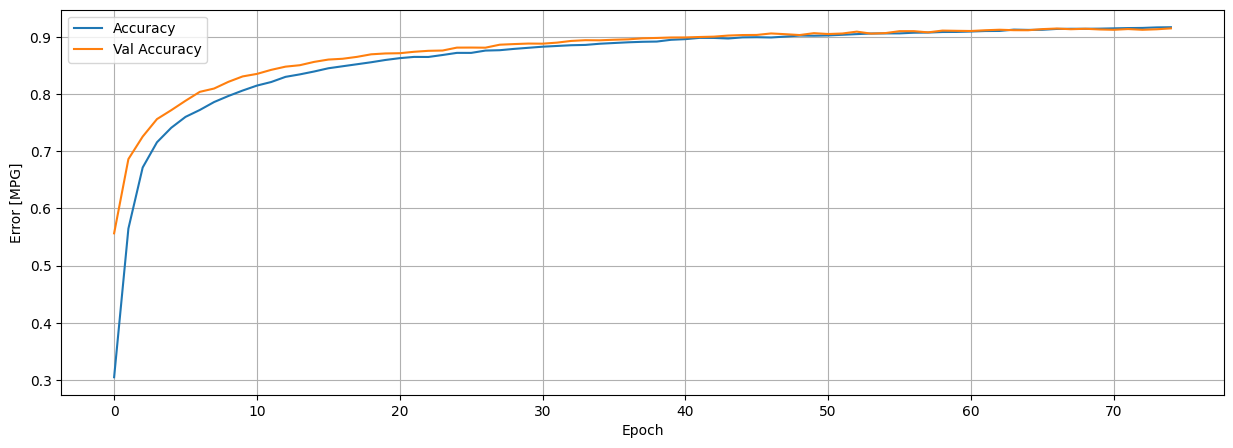

In [9]:
from tensorflow.keras.datasets import fashion_mnist

# Cargar las imágenes
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Normalizar las imagenes de escala de grises 0–255 (entre 0 –1):
X_train = X_train / 255 
X_test = X_test / 255

# Codificar las etiquetas de clase en formato de vectores categoricos:
y_train_cat = utils.to_categorical (y_train) 
y_test_cat = utils.to_categorical (y_test)

_, n_rows, n_cols = X_train.shape
channels = 1

print(n_rows, n_cols, channels)

# Número de clases
classes = np.unique(y_train)
num_classes = y_train_cat[0].shape[0]

print('Número de clases : ', num_classes)
print('Clases : ', classes)

plt.figure(figsize=[10,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(X_train[0,:,:], cmap="gray")
plt.title(f"Clase : {y_train[0]}")

# Display the first image in testing data
plt.subplot(122)
plt.imshow(X_test[0,:,:], cmap="gray")
plt.title(f"Clase : {y_test[0]}")

print(f"Muestras entrenamiento: {X_train.shape[0]}")
print(f"Muestras test: {X_test.shape[0]}")
print(f"Total muestras: {X_train.shape[0] + X_test.shape[0]}")

model = keras.Sequential()

model.add(layers.Conv2D(32, (3, 3), input_shape=(n_rows, n_cols, channels), activation="relu")) 
model.add(layers.Conv2D(32, (3, 3),  activation="relu")) 
model.add(layers.MaxPooling2D(pool_size=(2, 2))) 
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(64, (3, 3), activation="relu")) 
model.add(layers.Conv2D(64, (3, 3), activation="relu")) 
model.add(layers.MaxPooling2D(pool_size=(2, 2))) 
model.add(layers.Dropout(0.2))

model.add(layers.Flatten ())
model.add(layers.Dense(64, activation="relu")) 
model.add(layers.Dropout(0.2))
# Capa de salida:
model.add(layers.Dense(num_classes, activation="softmax"))

model.compile(loss="categorical_crossentropy",optimizer="adam", metrics=['accuracy'])
model.summary()

max_epochs = 100
n_iter_no_change = 3

earlystop_callback = callbacks.EarlyStopping(monitor='val_loss', verbose = 1, restore_best_weights = True, patience=n_iter_no_change)


fit_history = model.fit(X_train , y_train_cat, 
    validation_data=(X_test , y_test_cat), 
    epochs=max_epochs, 
    batch_size=6000, 
    verbose=1,
    callbacks = [earlystop_callback])

#Evaluamos la exactitud del modelo
scores = model.evaluate(X_test , y_test_cat , verbose=0)
print (f"Exactitud del modelo: {scores[1]}")

plt.figure(figsize=(15,5))
plt.plot(fit_history.history['loss'], label='Loss')
plt.plot(fit_history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.legend()
plt.grid(True)

plt.figure(figsize=(15,5))
plt.plot(fit_history.history['accuracy'], label='Accuracy')
plt.plot(fit_history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.legend()
plt.grid(True)



Prueba 1: se modifica el número de filtros en las primeras capas

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 26, 26, 46)        460       
                                                                 
 conv2d_9 (Conv2D)           (None, 24, 24, 46)        19090     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 12, 12, 46)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 12, 12, 46)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 10, 10, 72)        29880     
                                                                 
 conv2d_11 (Conv2D)          (None, 8, 8, 72)          46728     
                                                      

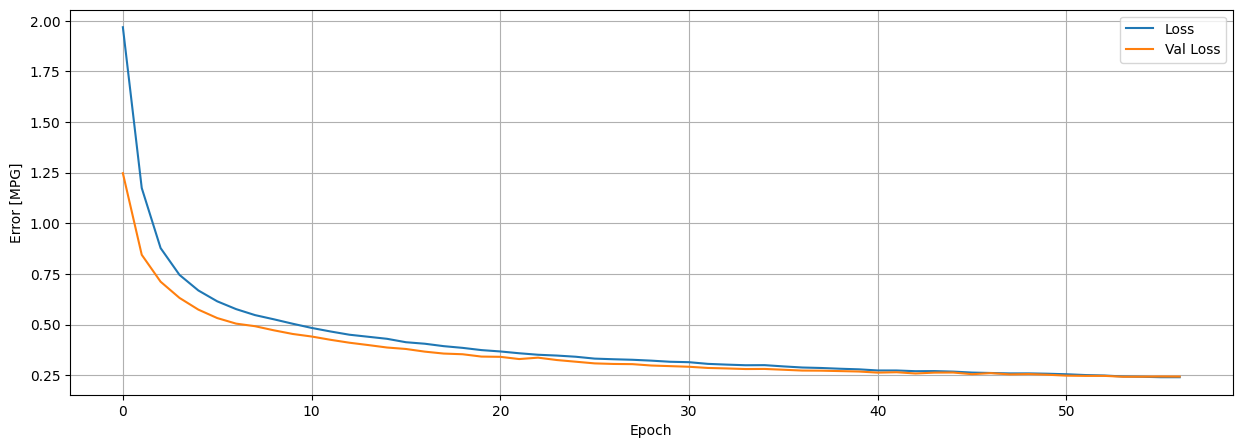

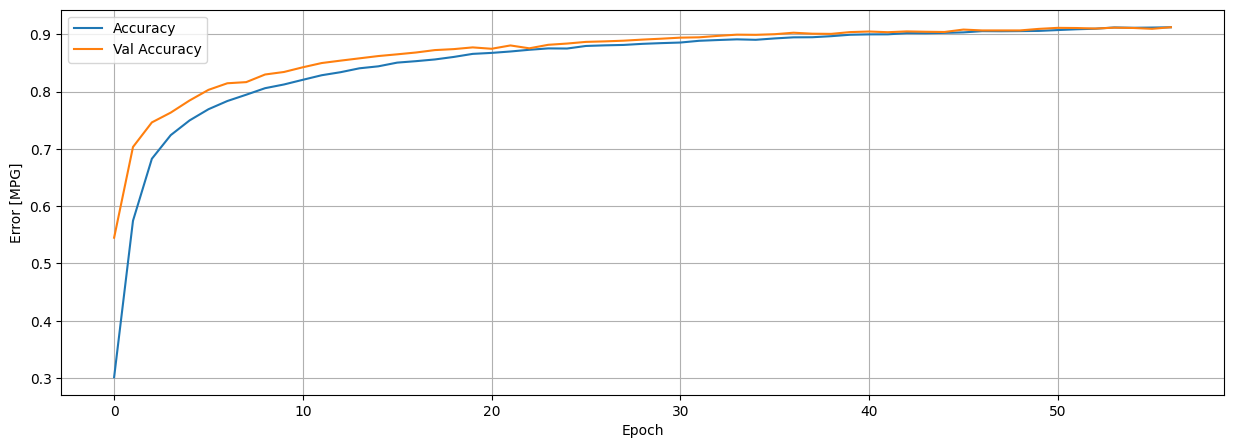

In [15]:

model2 = keras.Sequential()

model2.add(layers.Conv2D(46, (3, 3), input_shape=(n_rows, n_cols, channels), activation="relu")) 
model2.add(layers.Conv2D(46, (3, 3),  activation="relu")) 
model2.add(layers.MaxPooling2D(pool_size=(2, 2))) 
model2.add(layers.Dropout(0.2))

model2.add(layers.Conv2D(72, (3, 3), activation="relu")) 
model2.add(layers.Conv2D(72, (3, 3), activation="relu")) 
model2.add(layers.MaxPooling2D(pool_size=(2, 2))) 
model2.add(layers.Dropout(0.2))

model2.add(layers.Flatten ())
model2.add(layers.Dense(72, activation="relu")) 
model2.add(layers.Dropout(0.2))
# Capa de salida:
model2.add(layers.Dense(num_classes, activation="softmax"))

model2.compile(loss="categorical_crossentropy",optimizer="adam", metrics=['accuracy'])
model2.summary()

max_epochs = 100
n_iter_no_change = 3

earlystop_callback = callbacks.EarlyStopping(monitor='val_loss', verbose = 1, restore_best_weights = True, patience=n_iter_no_change)

fit_history = model2.fit(X_train , y_train_cat, 
    validation_data=(X_test , y_test_cat), 
    epochs=max_epochs, 
    batch_size=6000, 
    verbose=1,
    callbacks = [earlystop_callback])

#Evaluamos la exactitud del modelo
scores = model2.evaluate(X_test , y_test_cat , verbose=0)
print (f"Exactitud del modelo: {scores[1]}")

plt.figure(figsize=(15,5))
plt.plot(fit_history.history['loss'], label='Loss')
plt.plot(fit_history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.legend()
plt.grid(True)

plt.figure(figsize=(15,5))
plt.plot(fit_history.history['accuracy'], label='Accuracy')
plt.plot(fit_history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.legend()
plt.grid(True)


Resultado prueba 1: Se aumenta ligeramente la exactitud del modelo. Por lo que al aumentar el número de filtro, el modelo categoriza mejor las imagenes debido a recoger un mayor número de carcterísticas

Prueba 2: Probamos ahora a aumentar el tamaño del kernel

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 25, 25, 46)        782       
                                                                 
 conv2d_13 (Conv2D)          (None, 22, 22, 46)        33902     
                                                                 
 conv2d_14 (Conv2D)          (None, 19, 19, 46)        33902     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 9, 9, 46)         0         
 2D)                                                             
                                                                 
 dropout_9 (Dropout)         (None, 9, 9, 46)          0         
                                                                 
 conv2d_15 (Conv2D)          (None, 6, 6, 72)          53064     
                                                      

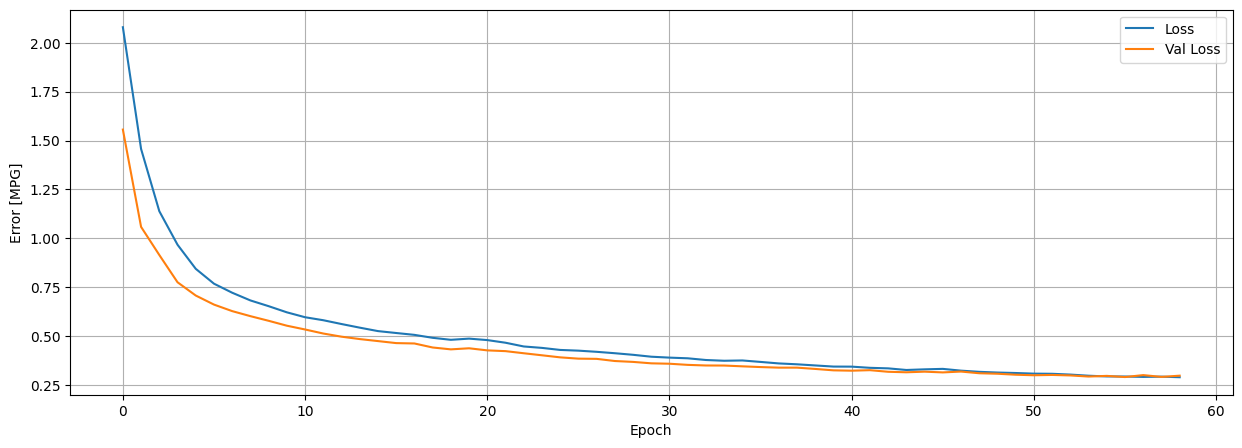

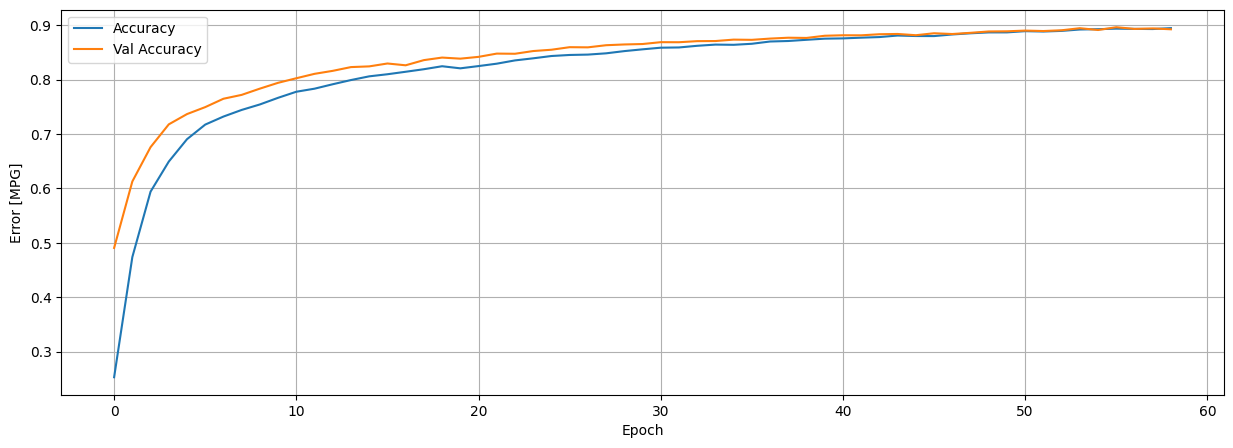

In [16]:

model2 = keras.Sequential()

model2.add(layers.Conv2D(46, (4, 4), input_shape=(n_rows, n_cols, channels), activation="relu")) 
model2.add(layers.Conv2D(46, (4, 4),  activation="relu")) 
model2.add(layers.Conv2D(46, (4, 4),  activation="relu")) 
model2.add(layers.MaxPooling2D(pool_size=(2, 2))) 
model2.add(layers.Dropout(0.2))

model2.add(layers.Conv2D(72, (4, 4), activation="relu")) 
model2.add(layers.Conv2D(72, (4, 4), activation="relu")) 
model2.add(layers.MaxPooling2D(pool_size=(2, 2))) 
model2.add(layers.Dropout(0.2))

model2.add(layers.Flatten ())
model2.add(layers.Dense(72, activation="relu")) 
model2.add(layers.Dropout(0.2))
# Capa de salida:
model2.add(layers.Dense(num_classes, activation="softmax"))

model2.compile(loss="categorical_crossentropy",optimizer="adam", metrics=['accuracy'])
model2.summary()

max_epochs = 100
n_iter_no_change = 3

earlystop_callback = callbacks.EarlyStopping(monitor='val_loss', verbose = 1, restore_best_weights = True, patience=n_iter_no_change)

fit_history = model2.fit(X_train , y_train_cat, 
    validation_data=(X_test , y_test_cat), 
    epochs=max_epochs, 
    batch_size=6000, 
    verbose=1,
    callbacks = [earlystop_callback])

#Evaluamos la exactitud del modelo
scores = model2.evaluate(X_test , y_test_cat , verbose=0)
print (f"Exactitud del modelo: {scores[1]}")

plt.figure(figsize=(15,5))
plt.plot(fit_history.history['loss'], label='Loss')
plt.plot(fit_history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.legend()
plt.grid(True)

plt.figure(figsize=(15,5))
plt.plot(fit_history.history['accuracy'], label='Accuracy')
plt.plot(fit_history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.legend()
plt.grid(True)


Resultado: Como se observa se reduce la exactitud del modelo al aumentar el tamaño del kernel, esto debido a una mayor perdida de información en la dimension de las imagenes.

Prueba 3. Se añade padding para paliar la perdida de información.

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 25, 25, 46)        782       
                                                                 
 conv2d_18 (Conv2D)          (None, 25, 25, 46)        33902     
                                                                 
 conv2d_19 (Conv2D)          (None, 25, 25, 46)        33902     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 12, 12, 46)       0         
 2D)                                                             
                                                                 
 dropout_12 (Dropout)        (None, 12, 12, 46)        0         
                                                                 
 zero_padding2d (ZeroPadding  (None, 16, 16, 46)       0         
 2D)                                                  

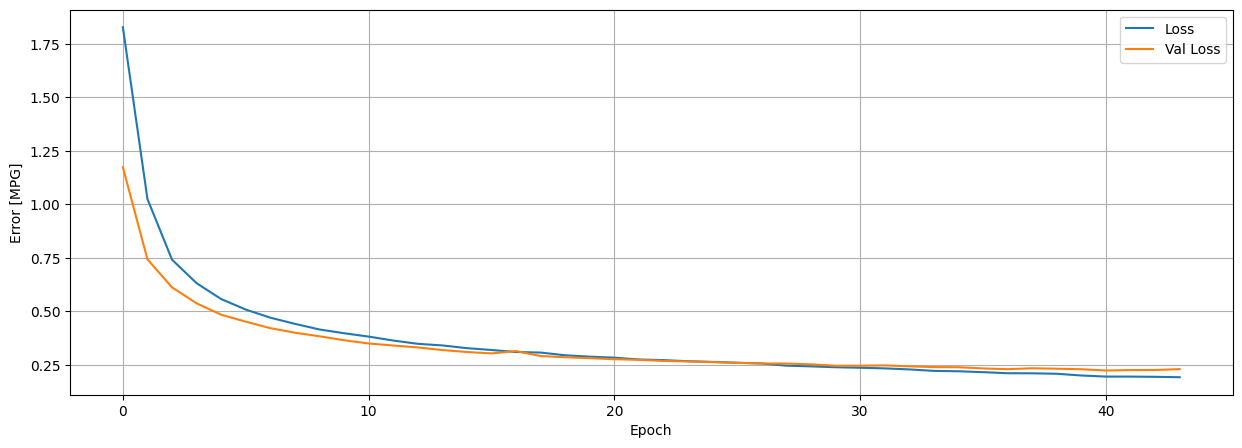

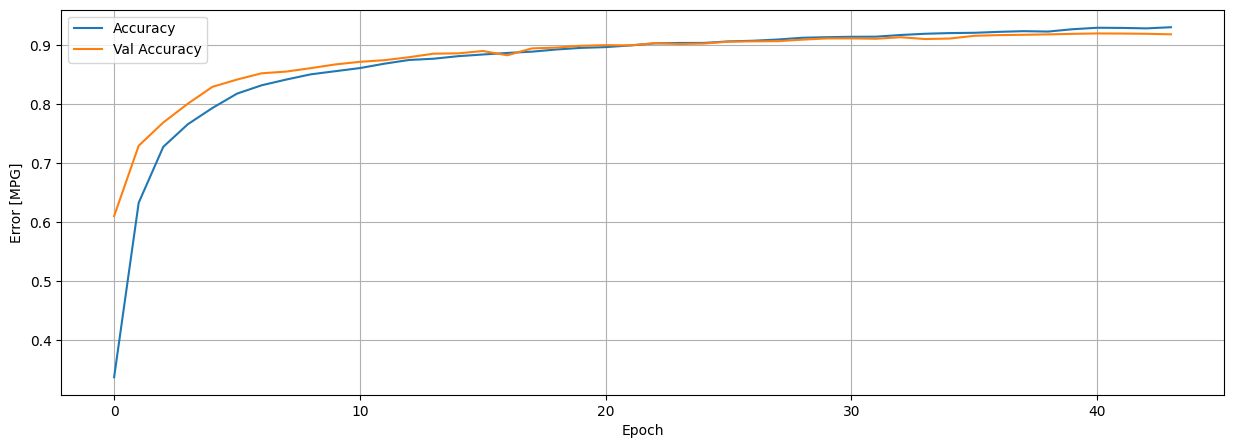

In [17]:

model2 = keras.Sequential()

model2.add(layers.Conv2D(46, (4, 4), input_shape=(n_rows, n_cols, channels), activation="relu")) 
model2.add(layers.Conv2D(46, (4, 4),  activation="relu", padding='same')) 
model2.add(layers.Conv2D(46, (4, 4),  activation="relu", padding='same')) 
model2.add(layers.MaxPooling2D(pool_size=(2, 2))) 
model2.add(layers.Dropout(0.2))

model2.add(keras.layers.ZeroPadding2D(padding=(2, 2)))
model2.add(layers.Conv2D(72, (4, 4), activation="relu", padding='same')) 
model2.add(layers.Conv2D(72, (4, 4), activation="relu")) 
model2.add(layers.MaxPooling2D(pool_size=(2, 2))) 
model2.add(layers.Dropout(0.2))

model2.add(layers.Flatten ())
model2.add(layers.Dense(72, activation="relu")) 
model2.add(layers.Dropout(0.2))
# Capa de salida:
model2.add(layers.Dense(num_classes, activation="softmax"))

model2.compile(loss="categorical_crossentropy",optimizer="adam", metrics=['accuracy'])
model2.summary()

max_epochs = 100
n_iter_no_change = 3

earlystop_callback = callbacks.EarlyStopping(monitor='val_loss', verbose = 1, restore_best_weights = True, patience=n_iter_no_change)

fit_history = model2.fit(X_train , y_train_cat, 
    validation_data=(X_test , y_test_cat), 
    epochs=max_epochs, 
    batch_size=6000, 
    verbose=1,
    callbacks = [earlystop_callback])

#Evaluamos la exactitud del modelo
scores = model2.evaluate(X_test , y_test_cat , verbose=0)
print (f"Exactitud del modelo: {scores[1]}")

plt.figure(figsize=(15,5))
plt.plot(fit_history.history['loss'], label='Loss')
plt.plot(fit_history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.legend()
plt.grid(True)

plt.figure(figsize=(15,5))
plt.plot(fit_history.history['accuracy'], label='Accuracy')
plt.plot(fit_history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.legend()
plt.grid(True)


Se observa que el padding evita la reducción de las imagenes en las capas convolucionales, y se obtiene un mejor resultado. 

Prueba 4: Se probará aumentando el tamaño de kernel junto con el padding y una capa nueva convolucional

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 25, 25, 46)        782       
                                                                 
 conv2d_23 (Conv2D)          (None, 25, 25, 46)        33902     
                                                                 
 conv2d_24 (Conv2D)          (None, 25, 25, 46)        33902     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 12, 12, 46)       0         
 g2D)                                                            
                                                                 
 dropout_15 (Dropout)        (None, 12, 12, 46)        0         
                                                                 
 zero_padding2d_1 (ZeroPaddi  (None, 16, 16, 46)       0         
 ng2D)                                                

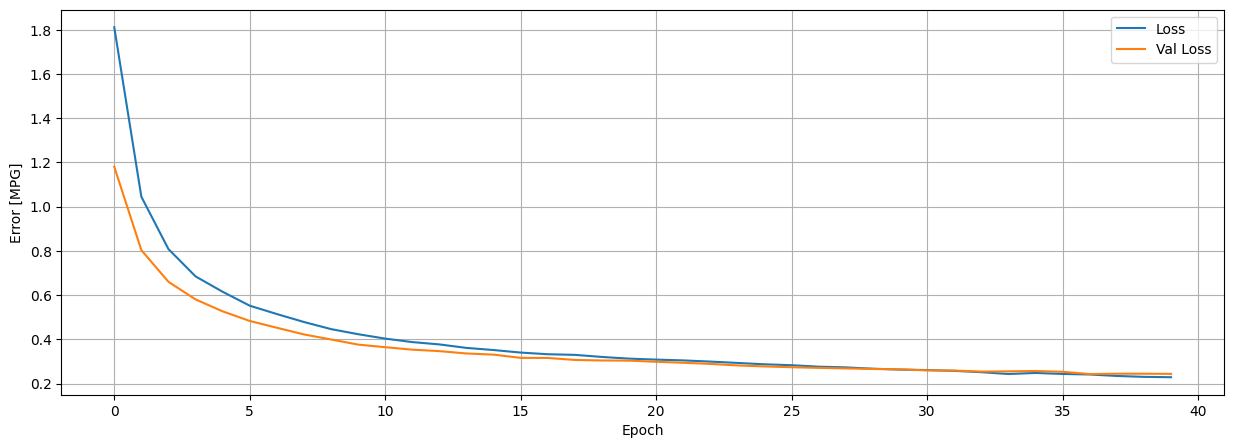

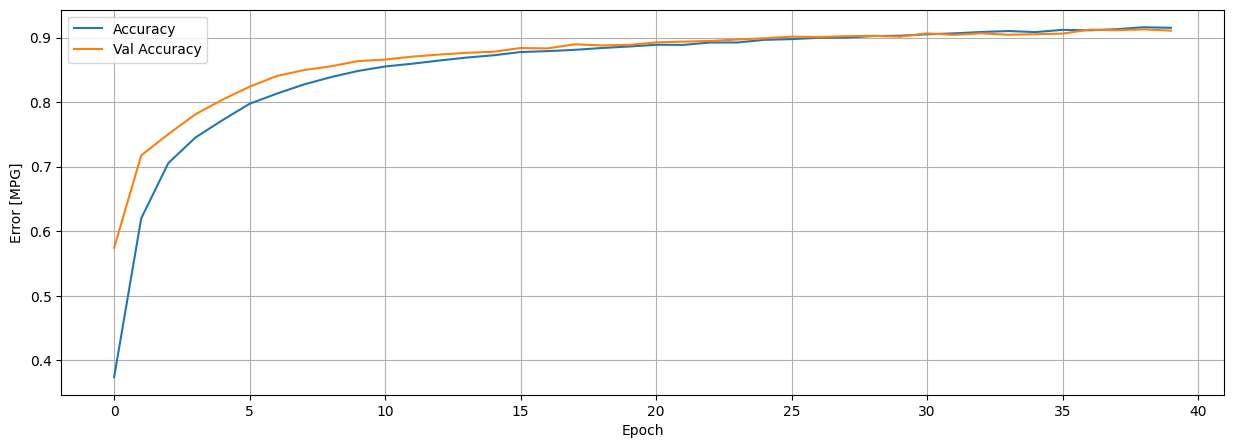

In [18]:

model2 = keras.Sequential()

model2.add(layers.Conv2D(46, (4, 4), input_shape=(n_rows, n_cols, channels), activation="relu")) 
model2.add(layers.Conv2D(46, (4, 4),  activation="relu", padding='same')) 
model2.add(layers.Conv2D(46, (4, 4),  activation="relu", padding='same')) 
model2.add(layers.MaxPooling2D(pool_size=(2, 2))) 
model2.add(layers.Dropout(0.2))

model2.add(keras.layers.ZeroPadding2D(padding=(2, 2)))
model2.add(layers.Conv2D(72, (4, 4), activation="relu", padding='same')) 
model2.add(layers.Conv2D(72, (4, 4), activation="relu")) 
model2.add(layers.MaxPooling2D(pool_size=(2, 2))) 
model2.add(layers.Dropout(0.2))

model2.add(layers.Flatten ())
model2.add(layers.Dense(72, activation="relu")) 
model2.add(layers.Dropout(0.2))
# Capa de salida:
model2.add(layers.Dense(num_classes, activation="softmax"))

model2.compile(loss="categorical_crossentropy",optimizer="adam", metrics=['accuracy'])
model2.summary()

max_epochs = 100
n_iter_no_change = 3

earlystop_callback = callbacks.EarlyStopping(monitor='val_loss', verbose = 1, restore_best_weights = True, patience=n_iter_no_change)

fit_history = model2.fit(X_train , y_train_cat, 
    validation_data=(X_test , y_test_cat), 
    epochs=max_epochs, 
    batch_size=6000, 
    verbose=1,
    callbacks = [earlystop_callback])

#Evaluamos la exactitud del modelo
scores = model2.evaluate(X_test , y_test_cat , verbose=0)
print (f"Exactitud del modelo: {scores[1]}")

plt.figure(figsize=(15,5))
plt.plot(fit_history.history['loss'], label='Loss')
plt.plot(fit_history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.legend()
plt.grid(True)

plt.figure(figsize=(15,5))
plt.plot(fit_history.history['accuracy'], label='Accuracy')
plt.plot(fit_history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.legend()
plt.grid(True)

Resultado: Observamos que en este caso se reduce la exactitud obtenida, aunque esto podría deberse a que el modelo haya caído en un máximo local y la función earlystop haya detenido el entrenamiento antes de que pudiera seguir mejorando.

Prueba 5: Se aumenta en 1 el número de iteraciones sin mejora permitidas por la función.

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 25, 25, 46)        782       
                                                                 
 conv2d_5 (Conv2D)           (None, 25, 25, 46)        33902     
                                                                 
 conv2d_6 (Conv2D)           (None, 25, 25, 46)        33902     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 46)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 12, 12, 46)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 12, 12, 72)        53064     
                                                      

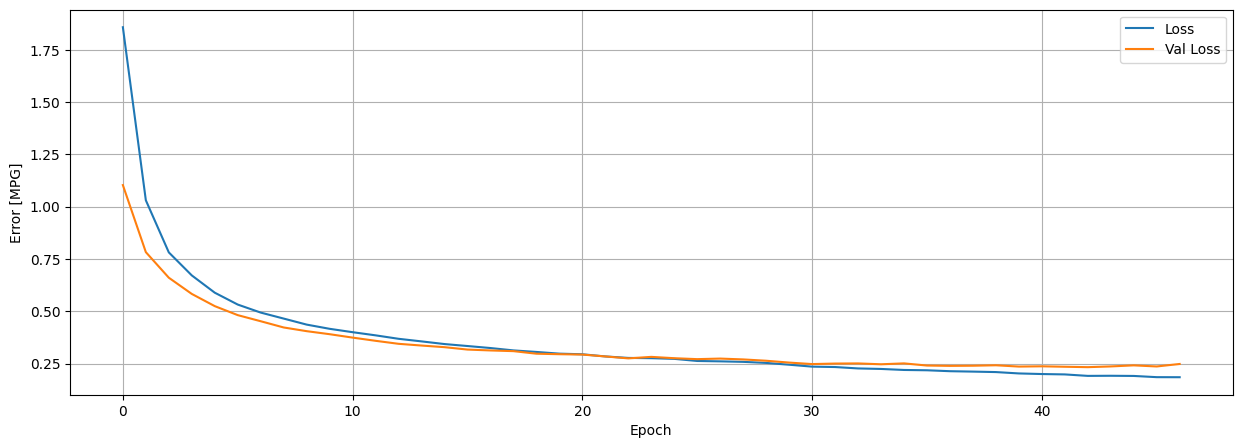

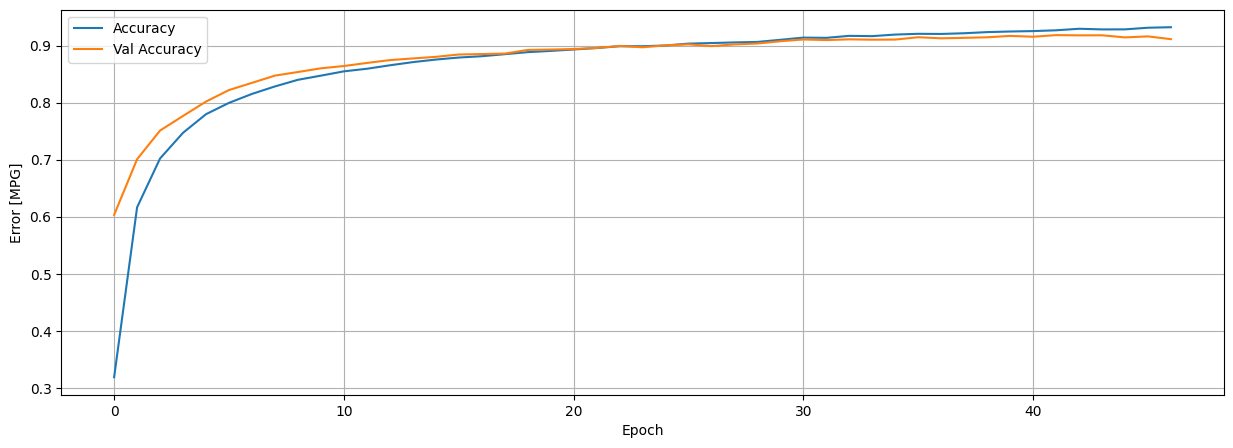

In [10]:

model2 = keras.Sequential()

model2.add(layers.Conv2D(46, (4, 4), input_shape=(n_rows, n_cols, channels), activation="relu")) 
model2.add(layers.Conv2D(46, (4, 4),  activation="relu", padding='same')) 
model2.add(layers.Conv2D(46, (4, 4),  activation="relu", padding='same')) 
model2.add(layers.MaxPooling2D(pool_size=(2, 2))) 
model2.add(layers.Dropout(0.2))

model2.add(layers.Conv2D(72, (4, 4), activation="relu", padding='same')) 
model2.add(layers.Conv2D(72, (4, 4), activation="relu", padding='same')) 
model2.add(layers.Conv2D(72, (4, 4), activation="relu", padding='same')) 
model2.add(layers.MaxPooling2D(pool_size=(2, 2))) 
model2.add(layers.Dropout(0.2))

model2.add(layers.Flatten ())
model2.add(layers.Dense(72, activation="relu")) 
model2.add(layers.Dropout(0.2))
# Capa de salida:
model2.add(layers.Dense(num_classes, activation="softmax"))

model2.compile(loss="categorical_crossentropy",optimizer="adam", metrics=['accuracy'])
model2.summary()

max_epochs = 100
n_iter_no_change = 4

earlystop_callback = callbacks.EarlyStopping(monitor='val_loss', verbose = 1, restore_best_weights = True, patience=n_iter_no_change)

fit_history = model2.fit(X_train , y_train_cat, 
    validation_data=(X_test , y_test_cat), 
    epochs=max_epochs, 
    batch_size=6000, 
    verbose=1,
    callbacks = [earlystop_callback])

#Evaluamos la exactitud del modelo
scores = model2.evaluate(X_test , y_test_cat , verbose=0)
print (f"Exactitud del modelo: {scores[1]}")

plt.figure(figsize=(15,5))
plt.plot(fit_history.history['loss'], label='Loss')
plt.plot(fit_history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.legend()
plt.grid(True)

plt.figure(figsize=(15,5))
plt.plot(fit_history.history['accuracy'], label='Accuracy')
plt.plot(fit_history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.legend()
plt.grid(True)

# Reponde las siguientes preguntas:

***->¿Qué ocurre con el tamaño de la imagen tras pasar por las capas convolucionales?***

Por regla general, el tamaño de la imagen se reduce después de pasar por una capa de convolución. Esto se debe a la operación de convolución, en la cual se generan mapas de características más pequeños al extraer y resumir información relevante de la imagen de entrada.
En esta operación el kernel se desplaza por la imagen provocando una reducción en el tamaño del mapa generado. Esto se debe a que, en cada posición, se toma una ventana de píxeles del tamaño del filtro y se calcula un solo valor, por lo que el resultado tiene dimensiones más pequeñas que la imagen de entrada original.

Una forma de evitar esto es mediante el uso de padding, al cual se le puede dar el valor “same” para que el mapa resultado tenga la misma dimensión que la imagen de entrada a la capa. Al aplicar este valor, se genera un “borde exterior” en la imagen de entrada que se elimina durante la convolución evitando de esa forma la perdida de dimensionalidad.

Si la imagen de entrada tiene unas dimensiones pequeñas como sucede en las empleadas para la práctica, está se puede llegar a eliminar por el empleo de sucesivas capas de convolución sin padding.


***->Mira la documentación de las capa Conv2D: ¿qué parametro o parámetros afectan al tamaño de la salida de la capa convolucional? Escribe el nombre y el efecto que produce.***

Hay cuatro parámetros que pueden afectar el tamaño de la salida de una capa convolucional:

1.	Tamaño del filtro (kernel_size): El tamaño del filtro especifica las dimensiones del filtro empleado en la convolución. Puede ser una tupla de dos enteros, por ejemplo, (3, 3) para un filtro de 3x3. El tamaño del filtro determina la cantidad de elementos vecinos en los que se realiza la operación de convolución. El kernel reduce la dimensión de la matriz siempre que no se use padding.

2.	Relleno (padding): El parámetro de relleno puede ser "valid" (sin relleno) o "same" (relleno para mantener el tamaño). Si se utiliza "valid", no se agrega ningún relleno y el tamaño de salida será menor que el tamaño de entrada. Si se utiliza "same", se agrega relleno para que la salida tenga el mismo tamaño que la entrada original.

3.	Tamaño del paso (stride): Este parámetro representa el desplazamiento del filtro en cada paso de la convolución. Si se usa un paso de 1 (el valor predeterminado), el filtro se desplaza una unidad en cada dirección. Si se usa un paso mayor que 1, el filtro se desplaza más rápidamente y, como resultado, el tamaño de salida se reduce.

4.	Capas de agrupación (pooling layers): Las capas de agrupación, como la capa MaxPooling o AveragePooling, se utilizan después de las capas convolucionales para reducir la dimensionalidad espacial de las características y resumirlas. Estas capas reducen el tamaño de la salida mediante un proceso de muestreo, reemplazando regiones de la entrada con un único valor representativo. 


***->¿Para qué crees que sirve el número de filtros de las capas convolucionales?***

El número de filtros en las capas convolucionales se refiere a la cantidad de filtros o detectores de características que se aplican durante el proceso de convolución de la red neuronal convolucional. Cada filtro es una matriz de pesos que se desliza sobre la entrada de la capa convolucional para extraer características específicas de la imagen o datos de entrada. 

El propósito de tener múltiples filtros en una capa convolucional es permitir que la red neuronal aprenda diferentes características en paralelo. Cada filtro está diseñado para detectar patrones específicos, como bordes, texturas o formas en la imagen de entrada. Al utilizar varios filtros, la red puede aprender a reconocer y extraer distintas características.

La capa aplica tantos filtros como se indique a la imagen de entrada lo que genera el mismo número de canales o mapas de características como resultado. Cada uno de ellos capturará una representación diferente de la imagen en función de los patrones que los filtros estén buscando.

